In [6]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans


In [7]:
x = np.random.random_sample((5,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
    x = np.append(x, random.uniform(0, 90))

y = np.random.random_sample((5,)) * 90  

for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))
    y = np.append(y, random.uniform(0, 90))

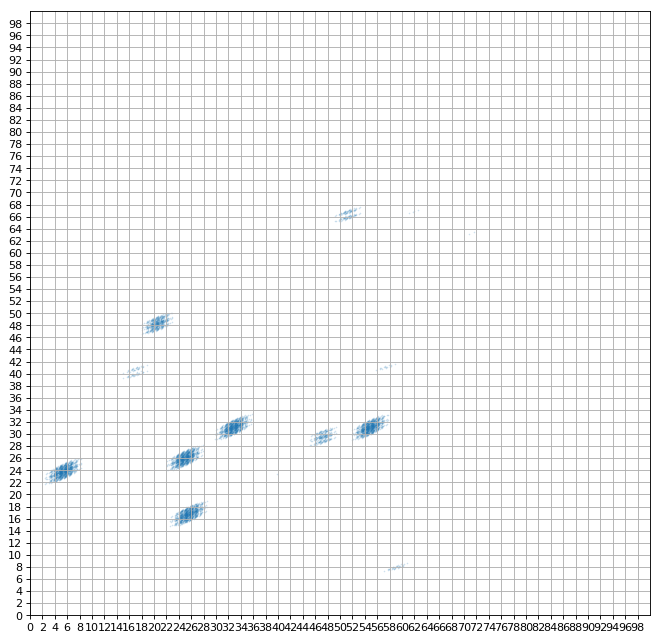

In [8]:
grid_size= 2

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.01)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

5123
5123
5123
[[76. 56.]
 [ 4. 80.]
 [ 4.  0.]
 ...
 [76. 56.]
 [20. 28.]
 [20. 60.]]
42
[[ 4.  0.]
 [ 4.  4.]
 [ 4. 80.]
 [ 4. 84.]
 [ 8.  0.]
 [ 8.  4.]
 [ 8. 80.]
 [ 8. 84.]
 [12. 84.]
 [20. 28.]
 [20. 60.]
 [44. 44.]
 [44. 48.]
 [44. 52.]
 [48. 44.]
 [48. 48.]
 [48. 52.]
 [76. 56.]
 [76. 60.]
 [80. 56.]
 [80. 60.]]


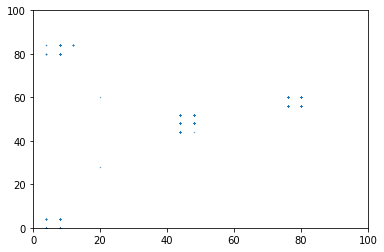

In [4]:
cellSize=4
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
xTransformed = x - x1
print(x.size)

print(xTransformed.size)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
agg = np.column_stack((xTransformed, yTransformed))
print(agg)

setAgg=np.unique(agg, axis=0)

print(setAgg.size)
print(setAgg)

plt.scatter(xTransformed, yTransformed, s=0.1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

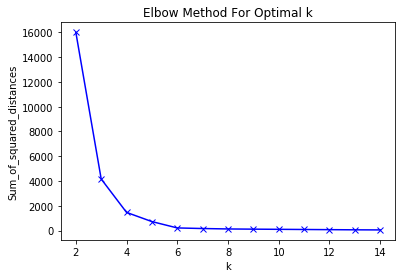

6
[[46.  48. ]
 [ 7.2 82.4]
 [ 6.   2. ]
 [78.  58. ]
 [20.  28. ]
 [20.  60. ]]


In [5]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(setAgg)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.9 here is just a threshhold 
    if(ratio < 1.9):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(setAgg)
print(km.cluster_centers_)